In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

#Summary Analysis (RUB)

remove "payout" at the end for better graphs

In [2]:
df_fin = pd.read_csv("D:\Python\WebApp\MLC_Finances_Eng_Final_UTF8.csv")

### use condensed to get summary statistics, split using the credit/debit column
df_fin_c = pd.read_csv("D:\Python\WebApp\MLC_Finances_Eng_Condensed_UTF8_V2.csv")

In [3]:
print(df_fin.size)

14982


In [4]:
df_fin.describe()

,Sum,Arkhipov,Arkhipov USD,Ventsel
count,1362.000000,1119.000000,64.000000,322.000000
mean,0.000000,0.000000,0.000000,0.000000
std,4709.803635,4751.131381,112.048176,3927.837722
min,-28800.000000,-28800.000000,-523.000000,-15000.000000
25%,-2000.000000,-2082.000000,-2.000000,-1300.000000
50%,200.000000,200.000000,-2.000000,0.000000
75%,2300.000000,2500.000000,40.000000,1287.500000
max,30300.000000,30300.000000,250.000000,19250.000000


In [5]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Operation       1362 non-null   object 
 1   Classification  1362 non-null   object 
 2   Sum             1362 non-null   int64  
 3   Category        1362 non-null   object 
 4   Date            1362 non-null   object 
 5   Owner           1362 non-null   object 
 6   Commentary Eng  1269 non-null   object 
 7   Commentary      1268 non-null   object 
 8   Arkhipov        1119 non-null   float64
 9   Arkhipov USD    64 non-null     float64
 10  Ventsel         322 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 117.2+ KB


In [6]:
df_fin['Date'] = pd.to_datetime(df_fin['Date'], format='%d/%m/%Y', errors='coerce')


In [7]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       1362 non-null   object        
 1   Classification  1362 non-null   object        
 2   Sum             1362 non-null   int64         
 3   Category        1362 non-null   object        
 4   Date            1359 non-null   datetime64[ns]
 5   Owner           1362 non-null   object        
 6   Commentary Eng  1269 non-null   object        
 7   Commentary      1268 non-null   object        
 8   Arkhipov        1119 non-null   float64       
 9   Arkhipov USD    64 non-null     float64       
 10  Ventsel         322 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 117.2+ KB


In [8]:
#to display the whole dataframe
##from IPython.display import display

## Display the entire DataFrame
##with pd.option_context('display.max_rows', None, 'display.max_columns', None):
##    display(df_fin)


In [9]:
df_fin.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
0,Head Purchase,Debit,-10000,Equipment,2015-08-01,Arkhipov,Denis for Heads,Дену за Headы,-10000.0,NaN,0.0
1,Membership Fee,Credit,29000,Membership Fee,2015-08-01,Arkhipov,Balance Remainder Arkhipov,Остаток у Arkhipovа,29000.0,NaN,0.0
2,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
3,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
4,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0


In [10]:
df_fin.tail()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
1357,Payout,Debit,-28800,Payout,2022-05-03,Arkhipov,Eugene (Liquidation),Eugene (Liquidation),-28800.0,NaN,NaN
1358,Payout,Debit,-9385,Payout,2022-05-03,Ventsel,Artur (Liquidation),Artur (Liquidation),NaN,NaN,-9385.0
1359,Payout,Debit,-15150,Payout,2022-05-07,Arkhipov,Artur (Liquidation),Artur (Liquidation),-15150.0,NaN,NaN
1360,Payout,Debit,-15150,Payout,2022-05-07,Arkhipov,Eugene (Liquidation),Eugene (Liquidation),-15150.0,NaN,NaN
1361,Field Fees,Credit,30300,Field,2022-05-07,Arkhipov,Shuxminov debt payment in full,Shuxminov,30300.0,NaN,NaN


##Financial Exploratory analysis General

###Split main database into RUB transactions only

In [11]:
# Create separate DataFrames for Credit/Debit and Credit USD/Debit USD transactions
df_fin_rub = df_fin[~df_fin['Classification'].str.contains('USD')]

In [12]:
df_fin_rub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Operation       1298 non-null   object        
 1   Classification  1298 non-null   object        
 2   Sum             1298 non-null   int64         
 3   Category        1298 non-null   object        
 4   Date            1295 non-null   datetime64[ns]
 5   Owner           1298 non-null   object        
 6   Commentary Eng  1205 non-null   object        
 7   Commentary      1204 non-null   object        
 8   Arkhipov        1119 non-null   float64       
 9   Arkhipov USD    0 non-null      float64       
 10  Ventsel         322 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 121.7+ KB


In [13]:
df_fin_rub.head()

,Operation,Classification,Sum,Category,Date,Owner,Commentary Eng,Commentary,Arkhipov,Arkhipov USD,Ventsel
0,Head Purchase,Debit,-10000,Equipment,2015-08-01,Arkhipov,Denis for Heads,Дену за Headы,-10000.0,NaN,0.0
1,Membership Fee,Credit,29000,Membership Fee,2015-08-01,Arkhipov,Balance Remainder Arkhipov,Остаток у Arkhipovа,29000.0,NaN,0.0
2,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
3,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0
4,Stick Sale,Credit,3000,Equipment,2015-08-01,Ventsel,NaN,NaN,0.0,NaN,3000.0


###Calculate the total sum spent on each category:

In [14]:
category_sums_rub = df_fin_rub.groupby('Category')['Sum'].sum()
print(category_sums_rub)

Category
Accounting Services             -12430
Digital Services                -33936
Equipment                       126939
Event                             5800
Field                            36489
Fine                              1000
Interest Payment                  1290
Internal Transfer                    0
International Membership Fee    -90659
Legal Services                  -40850
Loan                               650
Logistical Debits               -26151
Logistical Fees                  -5000
Marketing                        -4900
Membership Fee                  147400
Misc                             -7742
Payout                          -97900
Name: Sum, dtype: int64


###Calculate the number of transactions for each category:

In [15]:
category_transaction_counts_rub = df_fin_rub['Category'].value_counts()
print(category_transaction_counts_rub)

Equipment                       559
Field                           538
Membership Fee                   97
Logistical Debits                30
Digital Services                 19
Internal Transfer                10
Legal Services                    9
International Membership Fee      7
Loan                              6
Payout                            6
Marketing                         4
Accounting Services               4
Misc                              4
Event                             2
Logistical Fees                   1
Fine                              1
Interest Payment                  1
Name: Category, dtype: int64


category_transaction_counts_rub_2 = df_fin_rub.len()
print(category_transaction_counts_rub_2)

In [16]:
# Group the DataFrame by 'Category' and 'Date' and calculate the sum of 'Sum' and the count of transactions
category_sum_over_time = df_fin_rub.groupby(['Category', 'Date'])['Sum'].sum().reset_index()
category_count_over_time = df_fin_rub.groupby(['Category', 'Date']).size().reset_index(name='Count')

# Create a line graph for the sum of transactions over time for each category
fig_sum_over_time = px.line(category_sum_over_time, x='Date', y='Sum', color='Category',
                            title='Sum of Transactions Over Time (RUB)')

# Create a line graph for the number of transactions over time for each category
fig_count_over_time = px.line(category_count_over_time, x='Date', y='Count', color='Category',
                              title='Number of Transactions Over Time (RUB)')

# Show the interactive graphs
fig_sum_over_time.show()
fig_count_over_time.show()


###"Category" analysis:

In [17]:
category_classification_counts_rub = df_fin_rub.groupby(['Category', 'Classification'])['Operation'].count()
print(category_classification_counts_rub)

Category                      Classification
Accounting Services           Debit               4
Digital Services              Debit              19
Equipment                     Credit            330
                              Debit             229
Event                         Credit              2
Field                         Credit            292
                              Debit             246
Fine                          Credit              1
Interest Payment              Credit              1
Internal Transfer             Credit              5
                              Debit               5
International Membership Fee  Debit               7
Legal Services                Debit               9
Loan                          Credit              3
                              Debit               3
Logistical Debits             Debit              30
Logistical Fees               Debit               1
Marketing                     Debit               4
Membership Fee     

####Category totals

In [18]:
category_summary_rub = df_fin_rub.groupby('Category').agg({'Sum': ['sum', 'count']})
category_summary_rub.columns = ['Total Sum', 'Number of Transactions']
category_summary_rub = category_summary_rub.reset_index()

category_summary_rub['Profit/Loss per Transaction'] = category_summary_rub['Total Sum'] / category_summary_rub['Number of Transactions']


print(category_summary_rub)

                        Category  Total Sum  Number of Transactions  \
0            Accounting Services     -12430                       4   
1               Digital Services     -33936                      19   
2                      Equipment     126939                     559   
3                          Event       5800                       2   
4                          Field      36489                     538   
5                           Fine       1000                       1   
6               Interest Payment       1290                       1   
7              Internal Transfer          0                      10   
8   International Membership Fee     -90659                       7   
9                 Legal Services     -40850                       9   
10                          Loan        650                       6   
11             Logistical Debits     -26151                      30   
12               Logistical Fees      -5000                       1   
13    

###Top 10 Categories

In [19]:
# Sort the DataFrame by 'Total Sum' in descending order and select the top 10 rows
top_10_total_sum_rub = category_summary_rub.sort_values(by='Total Sum', ascending=False).head(10)

# Create a horizontal bar graph for 'Total Sum'
fig_total_sum_rub = px.bar(top_10_total_sum_rub, x='Category', y='Total Sum',
                      title='Top 10 Categories by Total Sum (RUB)')

# Create a horizontal bar graph for 'Number of Transactions'
top_10_transactions_rub = category_summary_rub.sort_values(by='Number of Transactions', ascending=False).head(10)
fig_transactions_rub = px.bar(top_10_transactions_rub, x='Category', y='Number of Transactions',
                          title='Top 10 Categories by Number of Transactions')

# Create a horizontal bar graph for 'Profit/Loss per Transaction'
top_10_profit_loss_rub = category_summary_rub.sort_values(by='Profit/Loss per Transaction', ascending=False).head(10)
fig_profit_loss_rub = px.bar(top_10_profit_loss_rub, x='Category', y='Profit/Loss per Transaction',
                        title='Top 10 Categories by Profit/Loss per Transaction (RUB)')

# Show the interactive graphs
fig_total_sum_rub.show()
fig_transactions_rub.show()
fig_profit_loss_rub.show()


###"Operation" summary

In [20]:
operation_summary_rub = df_fin_rub.groupby('Operation').agg({'Sum': ['sum', 'count']})
operation_summary_rub.columns = ['Total Sum', 'Number of Transactions']
operation_summary_rub = operation_summary_rub.reset_index()

# Calculate the Total Sum per Transaction
operation_summary_rub['Profit/Loss per Transaction'] = operation_summary_rub['Total Sum'] / operation_summary_rub['Number of Transactions']

print(operation_summary_rub)

             Operation  Total Sum  Number of Transactions  \
0        Ball Purchase      -4800                      32   
1       Ball Purchases      -2700                       1   
2            Ball Sale      20450                      96   
3               Credit       1290                       1   
4      Elbows Purchase     -42708                      23   
5          Elbows Sale      49350                      27   
6   Equipment Purchase     -68002                      26   
7       Equipment Sale      35180                      25   
8           Field Fees    1430805                     288   
9         Field Rental   -1405060                     244   
10     Gloves Purchase     -38900                      26   
11         Gloves Sale      54650                      24   
12       Head Purchase     -36488                      17   
13           Head Sale      61600                      21   
14     Helmet Purchase     -47296                      23   
15         Helmet Sale  

###"Operation" analysis

####Sum totals for operation variables 

In [21]:
# Create variables for each pair/group of rub operations
ball_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Ball Purchase', 'Ball Sale', 'Ball Purchases']), 'Sum'].sum()
elbows_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Elbows Purchase', 'Elbows Sale']), 'Sum'].sum()
equipment_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Equipment Purchase', 'Equipment Sale']), 'Sum'].sum()
field_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Field Fees', 'Field Rental']), 'Sum'].sum()
gloves_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Gloves Purchase', 'Gloves Sale']), 'Sum'].sum()
head_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Head Purchase', 'Head Sale']), 'Sum'].sum()
helmet_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Helmet Purchase', 'Helmet Sale']), 'Sum'].sum()
loan_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Loan Issuance', 'Loan Repayment', 'Loan']), 'Sum'].sum()
membership_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Membership Fee', 'Membership Fee EFL', 'Membership Fee FIL']), 'Sum'].sum()
shafts_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Shafts Purchase', 'Shafts Sale']), 'Sum'].sum()
stick_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Stick Sale', 'Sticks Purchase']), 'Sum'].sum()
strings_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['Strings Purchase', 'Strings Sale']), 'Sum'].sum()
t_shirt_total_rub = df_fin_rub.loc[df_fin_rub['Operation'].isin(['T-Shirt Sale', 'T-Shirts Purchase']), 'Sum'].sum()

In [22]:
# Create variables for rub operations without partners
bank_interest_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Credit', 'Sum'].sum()
materials_purchase_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Materials Purchase', 'Sum'].sum()
lacrosse_clinic_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Lacrosse Clinic', 'Sum'].sum()

In [23]:
# Add addditonal totals for rub
order_refund_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Order Refund', 'Sum'].sum()
payment_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Payment', 'Sum'].sum()
payout_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Payout', 'Sum'].sum()
player_fine_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Player Fine', 'Sum'].sum()
reimbursement_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Reimbursement', 'Sum'].sum()
shoulders_sale_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Shoulders Sale', 'Sum'].sum()
transfer_to_artur_total_rub = df_fin_rub.loc[df_fin_rub['Operation'] == 'Transfer to Artur', 'Sum'].sum()

####Print "Operation" totals:

In [24]:
ball_total_rub
elbows_total_rub
equipment_total_rub
field_total_rub
gloves_total_rub
head_total_rub
helmet_total_rub
loan_total_rub
shafts_total_rub
stick_total_rub
strings_total_rub
t_shirt_total_rub
membership_total_rub
order_refund_total_rub
payment_total_rub
payout_total_rub
player_fine_total_rub
reimbursement_total_rub
shoulders_sale_total_rub
transfer_to_artur_total_rub
bank_interest_rub
materials_purchase_rub
lacrosse_clinic_rub

5800

In [25]:
# Display the total sums for each rub operation
print("Ball Total RUB:", ball_total_rub)
print("Elbows Total RUB:", elbows_total_rub)
print("Equipment Total RUB:", equipment_total_rub)
print("Field Total RUB:", field_total_rub)
print("Gloves Total RUB:", gloves_total_rub)
print("Head Total RUB:", head_total_rub)
print("Helmet Total RUB:", helmet_total_rub)
print("Loan Total RUB:", loan_total_rub)
print("Shafts Total RUB:", shafts_total_rub)
print("Stick Total RUB:", stick_total_rub)
print("Strings Total RUB:", strings_total_rub)
print("T-Shirt Total RUB:", t_shirt_total_rub)
print("Membership Fee Total RUB:", membership_total_rub)
print("Order Refund Total RUB:", order_refund_total_rub)
print("Payment Total RUB:", payment_total_rub)
print("Payout Total RUB:", payout_total_rub)
print("Player Fine Total RUB:", player_fine_total_rub)
print("Reimbursement Total RUB:", reimbursement_total_rub)
print("Shoulders Sale Total RUB:", shoulders_sale_total_rub)
print("Transfer to Artur Total RUB:", transfer_to_artur_total_rub)
print("Bank Interest RUB:", bank_interest_rub)
print("Materials Purchase RUB:", materials_purchase_rub)
print("Lacrosse Clinic RUB:", lacrosse_clinic_rub)


Ball Total RUB: 12950
Elbows Total RUB: 6642
Equipment Total RUB: -32822
Field Total RUB: 25745
Gloves Total RUB: 15750
Head Total RUB: 25112
Helmet Total RUB: 28404
Loan Total RUB: 650
Shafts Total RUB: -19960
Stick Total RUB: 60854
Strings Total RUB: 8761
T-Shirt Total RUB: 171
Membership Fee Total RUB: 60285
Order Refund Total RUB: 14577
Payment Total RUB: -128859
Payout Total RUB: -97900
Player Fine Total RUB: 1000
Reimbursement Total RUB: 12950
Shoulders Sale Total RUB: 1000
Transfer to Artur Total RUB: 0
Bank Interest RUB: 1290
Materials Purchase RUB: -2400
Lacrosse Clinic RUB: 5800


###"Operation" Graphs

####Top 25 Profit Operations RUB

In [26]:
# Calculate the total sums for each operation
total_sums = [
    ("Ball", ball_total_rub),
    ("Elbows", elbows_total_rub),
    ("Equipment", equipment_total_rub),
    ("Field", field_total_rub),
    ("Gloves", gloves_total_rub),
    ("Head", head_total_rub),
    ("Helmet", helmet_total_rub),
    ("Loan", loan_total_rub),
    ("Membership", membership_total_rub),
    ("Shafts", shafts_total_rub),
    ("Stick", stick_total_rub),
    ("Strings", strings_total_rub),
    ("T-Shirt", t_shirt_total_rub),
]

# Create a DataFrame
df_total_sums_rub = pd.DataFrame(total_sums, columns=["Operation", "Total Sum"])

# Sort the DataFrame by Total Sum in descending order
df_total_sums_rub  = df_total_sums_rub .sort_values(by="Total Sum", ascending=False)

# Select the top 25 rows
top_25_total_sums = df_total_sums_rub .head(25)

# Create a bar graph
fig = px.bar(
    top_25_total_sums,
    x="Operation",
    y="Total Sum",
    labels={"Total Sum": "Total Sum (RUB)"},
    title="Top 25 Profit for Rub Operations",
)

# Show the graph
fig.show()


In [62]:
# Group the data by 'Operation' and sum the 'Sum' values for each group
operation_summary_rub = df_fin_rub.groupby('Operation')['Sum'].sum().reset_index()

# Sort the data in descending order by the 'Sum' column and get the top 15 rows
top_15_operations = operation_summary_rub.sort_values(by='Sum', ascending=False).head(15)

# Create a bar graph using Plotly Express
fig = px.bar(top_15_operations, x='Operation', y='Sum', title='Top 15 Operations by Total Sum (rub)')

# Show the graph
fig.show()

####Top 10 "Operations' by Sum

In [27]:
# Group the data by 'Operation' and sum the 'Sum' values for each group
operation_summary_rub = df_fin_rub.groupby('Operation')['Sum'].sum().reset_index()

# Sort the data in descending order by the 'Sum' column and get the top 10 rows
top_10_operations = operation_summary_rub.sort_values(by='Sum', ascending=False).head(10)

# Create a bar graph using Plotly Express
fig = px.bar(top_10_operations, x='Operation', y='Sum', title='Top 10 Operations by Total Sum (RUB)')

# Show the graph
fig.show()


####Total Sales over time (rub)

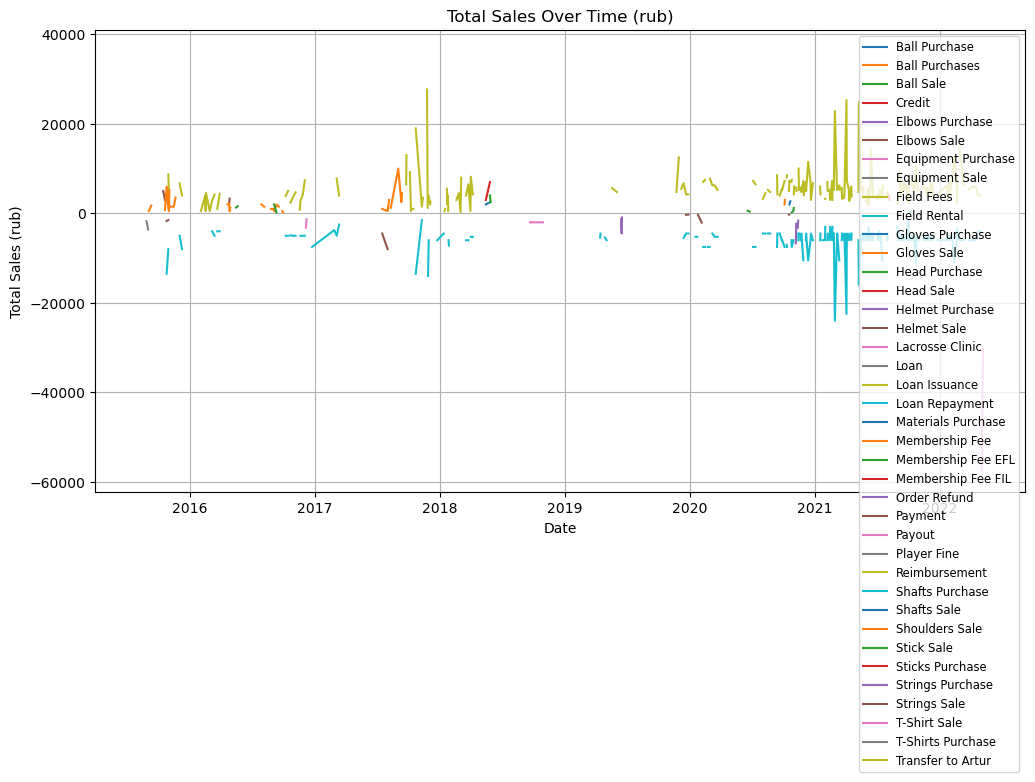

In [28]:
# Group the rub data by Date and the revenue variable and sum the "Sum" column
revenue_data_rub = df_fin_rub.groupby(['Date', 'Operation'])['Sum'].sum().unstack()

# Plot the data for each revenue variable
plt.figure(figsize=(12, 6))
for operation in revenue_data_rub.columns:
    plt.plot(revenue_data_rub.index, revenue_data_rub[operation], label=operation)

plt.xlabel('Date')
plt.ylabel('Total Sales (rub)')
plt.title('Total Sales Over Time (rub)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

####Revenue over time for "Ball Sale"

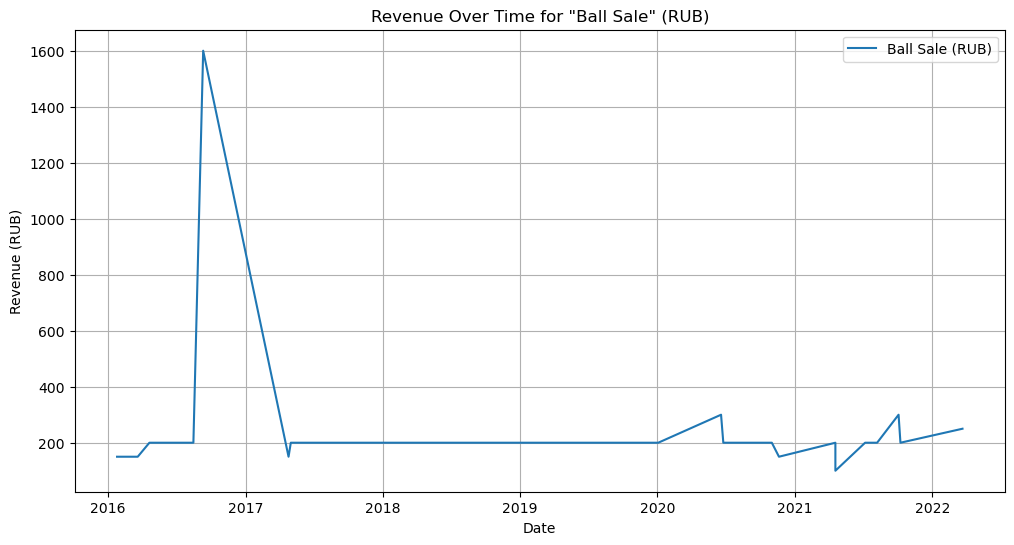

In [29]:
# Filter the data for a specific operation, e.g., "Ball Sale"
revenue_data_rub = df_fin_rub[df_fin_rub['Operation'] == 'Ball Sale']

# Plot the revenue data
plt.figure(figsize=(12, 6))
plt.plot(revenue_data_rub['Date'], revenue_data_rub['Sum'], label='Ball Sale (RUB)')

plt.xlabel('Date')
plt.ylabel('Revenue (RUB)')
plt.title('Revenue Over Time for "Ball Sale" (RUB)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


####Revenue Over time for different Operation types

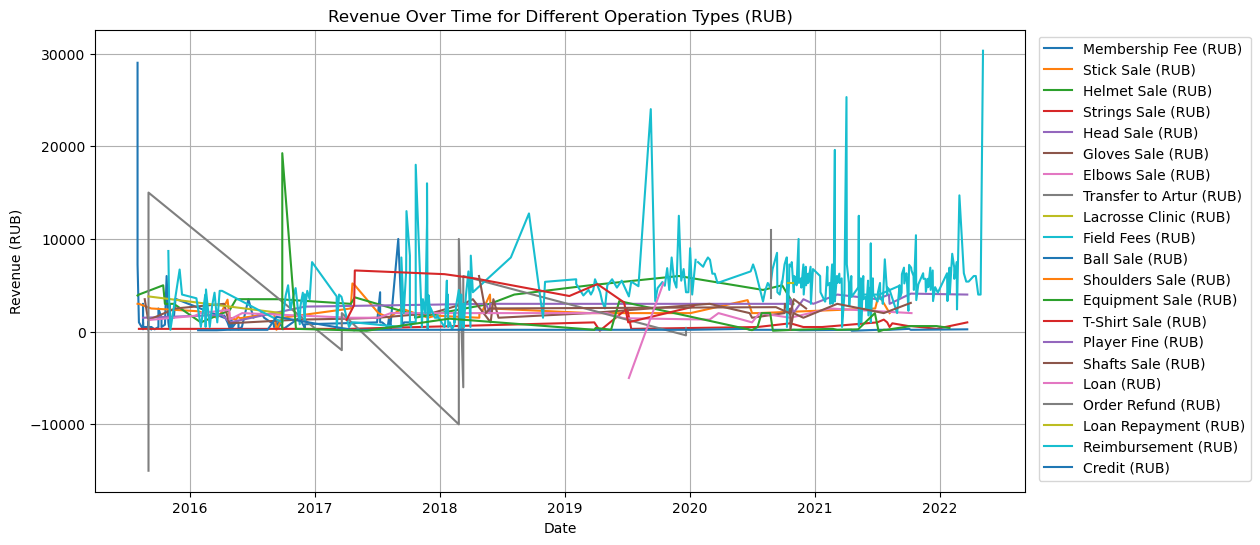

In [30]:
# Get the unique revenue operation types
revenue_operation_types = df_fin_rub[df_fin_rub['Sum'] > 0]['Operation'].unique()

# Plot line graphs for each revenue operation type
plt.figure(figsize=(12, 6))
for operation_type in revenue_operation_types:
    revenue_data_rub = df_fin_rub[df_fin_rub['Operation'] == operation_type]
    plt.plot(revenue_data_rub['Date'], revenue_data_rub['Sum'], label=f'{operation_type} (RUB)')

plt.xlabel('Date')
plt.ylabel('Revenue (RUB)')
plt.title('Revenue Over Time for Different Operation Types (RUB)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


In [31]:
# Get the unique revenue operation types
revenue_operation_types = df_fin_rub[df_fin_rub['Sum'] > 0]['Operation'].unique()

# Create an interactive line graph for each revenue operation type
fig = px.line(df_fin_rub[df_fin_rub['Sum'] > 0], x='Date', y='Sum', color='Operation',
              labels={'Sum': 'Revenue (RUB)'}, title='Revenue Over Time for Different Operation Types (RUB)',
              category_orders={"Operation": revenue_operation_types})
fig.update_layout(
    legend_title_text='Operation Type',
    height=600,  # Change the height to your desired value
    width=1000  # Change the width to your desired value
)


# Show the interactive graph
fig.show()


#####Revenue over time Interactive for different Operations

In [32]:
# Top 5 Expense Operation Types in RUB (excluding "Payout")
top_expense_rub = df_fin_rub[df_fin_rub['Sum'] < 0]
top_expense_rub = top_expense_rub[top_expense_rub['Operation'] != 'Payout']
top_expense_rub = top_expense_rub.groupby('Operation')['Sum'].sum().nsmallest(5).reset_index()

# Reverse the sorting order
top_expense_rub = top_expense_rub.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_expense_rub = px.bar(top_expense_rub, x='Sum', y='Operation', title='Top 5 Expense Operation Types (RUB)')

# Show or save the figure
fig_expense_rub.show()




####Top5 Revenue "Operation Types"

In [33]:
# Top 5 Revenue Operation Types in RUB
top_revenue_rub = df_fin_rub[df_fin_rub['Sum'] > 0]
top_revenue_rub = top_revenue_rub.groupby('Operation')['Sum'].sum().nlargest(5).reset_index()

# Reverse the sorting order
top_revenue_rub = top_revenue_rub.iloc[::-1]

# Create a horizontal bar graph with the highest value at the top
fig_revenue_rub = px.bar(top_revenue_rub, x='Sum', y='Operation', title='Top 5 Revenue Operation Types (RUB)')

# Show or save the figure
fig_revenue_rub.show()


##Turonver Calculations


In [34]:
# Calculate the total turnover as the sum of absolute values of the "Sum" column
total_turnover_rub = df_fin_rub['Sum'].abs().sum()

# Display the total turnover
print("Total Turnover (RUB):", total_turnover_rub)

Total Turnover (RUB): 4378614


##Revenue Calculations

In [35]:
# Calculate income and expenses for RUB DataFrame
income_rub = df_fin_rub[df_fin_rub['Classification'].isin(['Credit', 'Credit USD'])]['Sum'].sum()
expenses_rub = df_fin_rub[df_fin_rub['Classification'].isin(['Debit', 'Debit USD'])]['Sum'].sum()

# Exclude "Payout Total RUB"
expenses_rub -= payout_total_rub

# Display the results
print("Income RUB:", income_rub)
print("Expenses RUB:", expenses_rub)


Income RUB: 2189307
Expenses RUB: -2091407


##Profit Calculations

In [36]:
total_profit_rub = abs(payout_total_rub)


print(total_profit_rub)

97900


In [37]:
# Calculate profit margin (Profit as a percentage of income)
profit_margin_rub = (abs(payout_total_rub) / income_rub) * 100


# Display the results for USD
print("Profit Margin (RUB):", profit_margin_rub)



Profit Margin (RUB): 4.4717346630691805


##Revenue calculation for individual "Operations" USD

In [38]:
###test
# Filter the USD data frame for the "Ball Purchase" and "Ball Purchases" operations
ball_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Ball Sale'])]

# Calculate the sum of the "Ball Purchase" and "Ball Purchases" operations in USD
ball_revenue_rub = ball_revenue_rub['Sum'].sum()

print(ball_revenue_rub)

20450


In [39]:
###test 
test = ball_total_rub / ball_revenue_rub

print(ball_total_rub)
print(ball_revenue_rub)
print(test)

12950
20450
0.6332518337408313


##Revenue calculation for individual "Operations" RUB

In [40]:
# Filter the rub data frame for the specified operations for each category
ball_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Ball Sale'])]['Sum'].sum()
elbows_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Elbows Sale'])]['Sum'].sum()
equipment_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Equipment Sale'])]['Sum'].sum()
gloves_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Gloves Sale'])]['Sum'].sum()
head_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Head Sale'])]['Sum'].sum()
helmet_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Helmet Sale'])]['Sum'].sum()
shafts_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Shafts Sale'])]['Sum'].sum()
stick_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Stick Sale'])]['Sum'].sum()
strings_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Strings Sale'])]['Sum'].sum()
t_shirt_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['T-Shirt Sale'])]['Sum'].sum()
order_refund_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Order Refund'])]['Sum'].sum()
membership_fee_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Membership Fee'])]['Sum'].sum()
player_fine_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Player Fine'])]['Sum'].sum()
reimbursement_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Reimbursement'])]['Sum'].sum()
shoulders_sale_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Shoulders Sale'])]['Sum'].sum()
loan_revenue_rub = (df_fin_rub[df_fin_rub['Operation'].isin(['Loan Repayment'])]['Sum'].sum()) + (df_fin_rub[df_fin_rub['Operation'].isin(['Loan'])]['Sum'].sum())
bank_interest_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Credit'])]['Sum'].sum()
lacrosse_clinic_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Lacrosse Clinic'])]['Sum'].sum()
field_revenue_rub = df_fin_rub[df_fin_rub['Operation'].isin(['Field Fees'])]['Sum'].sum()

In [41]:
# Display the revenue for each category in rub
print("Ball Revenue (rub): {:.2f}".format(ball_revenue_rub))
print("Elbows Revenue (rub): {:.2f}".format(elbows_revenue_rub))
print("Equipment Revenue (rub): {:.2f}".format(equipment_revenue_rub))
print("Gloves Revenue (rub): {:.2f}".format(gloves_revenue_rub))
print("Head Revenue (rub): {:.2f}".format(head_revenue_rub))
print("Helmet Revenue (rub): {:.2f}".format(helmet_revenue_rub))
print("Shafts Revenue (rub): {:.2f}".format(shafts_revenue_rub))
print("Stick Revenue (rub): {:.2f}".format(stick_revenue_rub))
print("Strings Revenue (rub): {:.2f}".format(strings_revenue_rub))
print("T-Shirt Revenue (rub): {:.2f}".format(t_shirt_revenue_rub))
print("Order Refund Revenue (rub): {:.2f}".format(order_refund_revenue_rub))
print("Membership Fee Revenue (rub): {:.2f}".format(membership_fee_revenue_rub))
print("Player Fine Revenue (rub): {:.2f}".format(player_fine_revenue_rub))
print("Reimbursement Revenue (rub): {:.2f}".format(reimbursement_revenue_rub))
print("Shoulders Sale Revenue (rub): {:.2f}".format(shoulders_sale_revenue_rub))
print("Loan Revenue (rub): {:.2f}".format(loan_revenue_rub))
print("Bank Interest Revenue (rub): {:.2f}".format(bank_interest_revenue_rub))
print("Lacrosse Clinic Revenue (rub): {:.2f}".format(lacrosse_clinic_revenue_rub))
print("Field Revenue (rub): {:.2f}".format(field_revenue_rub))


Ball Revenue (rub): 20450.00
Elbows Revenue (rub): 49350.00
Equipment Revenue (rub): 35180.00
Gloves Revenue (rub): 54650.00
Head Revenue (rub): 61600.00
Helmet Revenue (rub): 75700.00
Shafts Revenue (rub): 29440.00
Stick Revenue (rub): 141050.00
Strings Revenue (rub): 16000.00
T-Shirt Revenue (rub): 38471.00
Order Refund Revenue (rub): 14577.00
Membership Fee Revenue (rub): 150944.00
Player Fine Revenue (rub): 1000.00
Reimbursement Revenue (rub): 12950.00
Shoulders Sale Revenue (rub): 1000.00
Loan Revenue (rub): 10650.00
Bank Interest Revenue (rub): 1290.00
Lacrosse Clinic Revenue (rub): 5800.00
Field Revenue (rub): 1430805.00


##Profit Percentage Calculation (RUB)

In [42]:
ball_profit_percent_rub = ball_total_rub / ball_revenue_rub
elbows_profit_percent_rub = elbows_total_rub / elbows_revenue_rub
equipment_profit_percent_rub = equipment_total_rub / equipment_revenue_rub
field_profit_percent_rub = field_total_rub / field_revenue_rub
gloves_profit_percent_rub = gloves_total_rub / gloves_revenue_rub
head_profit_percent_rub = head_total_rub / head_revenue_rub
helmet_profit_percent_rub = helmet_total_rub / helmet_revenue_rub
loan_profit_percent_rub = loan_total_rub / loan_revenue_rub
shafts_profit_percent_rub = shafts_total_rub / shafts_revenue_rub
stick_profit_percent_rub = stick_total_rub / stick_revenue_rub
strings_profit_percent_rub = strings_total_rub / strings_revenue_rub
t_shirt_profit_percent_rub = t_shirt_total_rub / t_shirt_revenue_rub
membership_profit_percent_rub = membership_total_rub / membership_fee_revenue_rub
order_refund_profit_percent_rub = order_refund_total_rub / order_refund_revenue_rub
player_fine_profit_percent_rub = player_fine_total_rub / player_fine_revenue_rub
reimbursement_profit_percent_rub = reimbursement_total_rub / reimbursement_revenue_rub
shoulders_sale_profit_percent_rub = shoulders_sale_total_rub / shoulders_sale_revenue_rub
bank_interest_profit_percent_rub = bank_interest_rub / bank_interest_revenue_rub
lacrosse_clinic_profit_percent_rub = lacrosse_clinic_rub / lacrosse_clinic_revenue_rub

In [43]:
ball_profit_percent_rub
elbows_profit_percent_rub
equipment_profit_percent_rub
field_profit_percent_rub
gloves_profit_percent_rub
head_profit_percent_rub
helmet_profit_percent_rub
loan_profit_percent_rub
shafts_profit_percent_rub
stick_profit_percent_rub
strings_profit_percent_rub
t_shirt_profit_percent_rub
membership_profit_percent_rub
order_refund_profit_percent_rub
player_fine_profit_percent_rub
reimbursement_profit_percent_rub
shoulders_sale_profit_percent_rub
bank_interest_profit_percent_rub
lacrosse_clinic_profit_percent_rub

1.0

###Print Profit Percentage (RUB)

In [44]:
print("Ball Profit Percent (rub): {:.2f}%".format(ball_profit_percent_rub * 100))
print("Elbows Profit Percent (rub): {:.2f}%".format(elbows_profit_percent_rub * 100))
print("Equipment Profit Percent (rub): {:.2f}%".format(equipment_profit_percent_rub * 100))
print("Field Profit Percent (rub): {:.2f}%".format(field_profit_percent_rub * 100))
print("Gloves Profit Percent (rub): {:.2f}%".format(gloves_profit_percent_rub * 100))
print("Head Profit Percent (rub): {:.2f}%".format(head_profit_percent_rub * 100))
print("Helmet Profit Percent (rub): {:.2f}%".format(helmet_profit_percent_rub * 100))
print("Loan Profit Percent (rub): {:.2f}%".format(loan_profit_percent_rub * 100))
print("Shafts Profit Percent (rub): {:.2f}%".format(shafts_profit_percent_rub * 100))
print("Stick Profit Percent (rub): {:.2f}%".format(stick_profit_percent_rub * 100))
print("Strings Profit Percent (rub): {:.2f}%".format(strings_profit_percent_rub * 100))
print("T-Shirt Profit Percent (rub): {:.2f}%".format(t_shirt_profit_percent_rub * 100))
print("Membership Fee Profit Percent (rub): {:.2f}%".format(membership_profit_percent_rub * 100))
print("Order Refund Profit Percent (rub): {:.2f}%".format(order_refund_profit_percent_rub * 100))
print("Player Fine Profit Percent (rub): {:.2f}%".format(player_fine_profit_percent_rub * 100))
print("Reimbursement Profit Percent (rub): {:.2f}%".format(reimbursement_profit_percent_rub * 100))
print("Shoulders Sale Profit Percent (rub): {:.2f}%".format(shoulders_sale_profit_percent_rub * 100))
print("Bank Interest Profit Percent (rub): {:.2f}%".format(bank_interest_profit_percent_rub * 100))
print("Lacrosse Clinic Profit Percent (rub): {:.2f}%".format(lacrosse_clinic_profit_percent_rub * 100))

Ball Profit Percent (rub): 63.33%
Elbows Profit Percent (rub): 13.46%
Equipment Profit Percent (rub): -93.30%
Field Profit Percent (rub): 1.80%
Gloves Profit Percent (rub): 28.82%
Head Profit Percent (rub): 40.77%
Helmet Profit Percent (rub): 37.52%
Loan Profit Percent (rub): 6.10%
Shafts Profit Percent (rub): -67.80%
Stick Profit Percent (rub): 43.14%
Strings Profit Percent (rub): 54.76%
T-Shirt Profit Percent (rub): 0.44%
Membership Fee Profit Percent (rub): 39.94%
Order Refund Profit Percent (rub): 100.00%
Player Fine Profit Percent (rub): 100.00%
Reimbursement Profit Percent (rub): 100.00%
Shoulders Sale Profit Percent (rub): 100.00%
Bank Interest Profit Percent (rub): 100.00%
Lacrosse Clinic Profit Percent (rub): 100.00%


####Top 15 Profit Percentages of "Operations"

In [45]:
# Create a dictionary with the profit percentages
profit_percentages_rub = {
    "Ball": ball_profit_percent_rub,
    "Elbows": elbows_profit_percent_rub,
    "Equipment": equipment_profit_percent_rub,
    "Field": field_profit_percent_rub,
    "Gloves": gloves_profit_percent_rub,
    "Head": head_profit_percent_rub,
    "Helmet": helmet_profit_percent_rub,
    "Loan": loan_profit_percent_rub,
    "Shafts": shafts_profit_percent_rub,
    "Stick": stick_profit_percent_rub,
    "Strings": strings_profit_percent_rub,
    "T-Shirt": t_shirt_profit_percent_rub,
    "Membership Fee": membership_profit_percent_rub,
    "Order Refund": order_refund_profit_percent_rub,
    "Player Fine": player_fine_profit_percent_rub,
    "Shoulders Sale": shoulders_sale_profit_percent_rub,
    "Bank Interest": bank_interest_profit_percent_rub,
    "Lacrosse Clinic": lacrosse_clinic_profit_percent_rub
}

# Sort the dictionary by profit percentages and take the top 15
top_15_profit_percentages_rub = dict(sorted(profit_percentages_rub.items(), key=lambda item: item[1], reverse=True)[:15])

# Create a DataFrame from the top 15 profit percentages
df_top_15_profit_rub = pd.DataFrame(list(top_15_profit_percentages_rub.items()), columns=["Operation", "Profit Percentage (RUB)"])

# Create a bar graph
fig = px.bar(df_top_15_profit_rub, x="Operation", y="Profit Percentage (RUB)", title="Top 15 Profit Percentages (RUB)")
fig.show()


####Top 5 Most Profitable by volume RUB Operations by profit percentage

In [46]:
# Calculate the profit percentages for each operation
profit_percentages = {
    "Stick": stick_profit_percent_rub,
    "Membership Fee": membership_profit_percent_rub,
    "Helmet": helmet_profit_percent_rub,
    "Field": field_profit_percent_rub,
    "Head": head_profit_percent_rub
}

# Sort the profit percentages dictionary by the profit percentage in descending order
sorted_profit_percentages = dict(sorted(profit_percentages.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted profit percentages
df_sorted_profit_percentages = pd.DataFrame(list(sorted_profit_percentages.items()), columns=["Operation", "Profit Percentage (RUB)"])

# Create a bar graph
fig = px.bar(df_sorted_profit_percentages, x="Operation", y="Profit Percentage (RUB)",
             title="Top 5 Most Profitable by volume RUB Operations by profit percentage")
fig.show()



#Other Visualizations

##Cumulative Fund Sum Over Time (RUB)

In [47]:
# Calculate the cumulative sum of daily "Sum" (Profit/Loss)
df_fin_rub = df_fin_rub.assign(**{'Fund Cumulative': df_fin_rub['Sum'].cumsum()})




# Create a line graph to visualize the cumulative sum over time
fig_cumulative_sum_rub = px.line(df_fin_rub, x='Date', y='Fund Cumulative',
                                  title='Cumulative Sum Over Time (RUB)')

# Show the interactive graph
fig_cumulative_sum_rub.show()



##Net Profit/Loss per Month (RUB) (chronological)

In [48]:
#take out all payout operations
# Assuming you have a DataFrame 'df_fin'
# Filter out rows with "payout" in the 'Operation' column and replace the original DataFrame
df_fin_rub = df_fin_rub[df_fin_rub['Operation'] != 'Payout']


# Assuming you have a DataFrame 'df_fin_rub' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Extract month and year from the 'Date' column
df_fin_rub['Month'] = df_fin_rub['Date'].dt.to_period('M')

# Calculate the sum of profits and losses for each month
profits = df_fin_rub[df_fin_rub['Sum'] > 0].groupby('Month')['Sum'].sum()
losses = df_fin_rub[df_fin_rub['Sum'] < 0].groupby('Month')['Sum'].sum()

# Calculate the net profit or loss for each month
net_profit_loss = profits.add(losses, fill_value=0)

# Convert 'Month' to strings
net_profit_loss.index = net_profit_loss.index.astype(str)

# Create a bar graph
fig = px.bar(x=net_profit_loss.index, y=net_profit_loss.values, title='Net Profit/Loss by Month')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()





##Net Profit/Loss per year (RUB) (chronological)

In [49]:
# Assuming you have a DataFrame 'df_fin_rub' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Extract the year from the 'Date' column
df_fin_rub['Year'] = df_fin_rub['Date'].dt.year

# Calculate the sum of profits and losses for each year
profits = df_fin_rub[df_fin_rub['Sum'] > 0].groupby('Year')['Sum'].sum()
losses = df_fin_rub[df_fin_rub['Sum'] < 0].groupby('Year')['Sum'].sum()

# Calculate the net profit or loss for each year
net_profit_loss = profits.add(losses, fill_value=0)

# Convert 'Year' to strings
net_profit_loss.index = net_profit_loss.index.astype(str)

# Create a bar graph
fig_net = px.bar(x=net_profit_loss.index, y=net_profit_loss.values, title='Net Profit/Loss by Year')
fig_net.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig_net.update_xaxes(title_text='Year')
fig_net.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig_net.show()


##Net Profit/Loss per Month grouped (USD) 

In [50]:
# Assuming you have a DataFrame 'df_fin_rub' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Extract the month from the 'Date' column
df_fin_rub['Month'] = df_fin_rub['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_rub[df_fin_rub['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_rub[df_fin_rub['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Profit'] + merged['Sum_Loss']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Net Profit/Loss by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()


##Monthly Revenue/Expenses (RUB)

In [51]:
# Assuming df_fin_rub and df_fin_usd are your dataframes
# We'll work with df_fin_rub for this example

# Convert the 'Date' column to datetime
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Calculate revenue and expenses per month
revenue_per_month = df_fin_rub[df_fin_rub['Sum'] > 0].groupby(df_fin_rub['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()
expenses_per_month = df_fin_rub[df_fin_rub['Sum'] < 0].groupby(df_fin_rub['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()

# Create a bar graph for revenue per month
fig_revenue = px.bar(revenue_per_month, x='Date', y='Sum', labels={'Date': 'Month', 'Sum': 'Revenue (RUB)'},
                    title='Monthly Revenue (RUB)')

# Create a bar graph for expenses per month
fig_expenses = px.bar(expenses_per_month, x='Date', y='Sum', labels={'Date': 'Month', 'Sum': 'Expenses (RUB)'},
                     title='Monthly Expenses (RUB)')

# Show the graphs
fig_revenue.show()
fig_expenses.show()


##Revenue by Month (Grouped)

In [52]:
# Assuming you have a DataFrame 'df_fin_rub' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Extract the month from the 'Date' column
df_fin_rub['Month'] = df_fin_rub['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_rub[df_fin_rub['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_rub[df_fin_rub['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged_profit = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Profit']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Revenue by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()




##Expenses by Month (Grouped)

In [53]:
# Assuming you have a DataFrame 'df_fin_rub' with 'Date' and 'Sum' columns
# Ensure 'Date' is a datetime column
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Extract the month from the 'Date' column
df_fin_rub['Month'] = df_fin_rub['Date'].dt.strftime('%B')

# Calculate the sum of profits and losses for each month
profits = df_fin_rub[df_fin_rub['Sum'] > 0].groupby('Month')['Sum'].sum().reset_index()
losses = df_fin_rub[df_fin_rub['Sum'] < 0].groupby('Month')['Sum'].sum().reset_index()

# Merge the profits and losses dataframes
merged = pd.merge(profits, losses, on='Month', how='outer', suffixes=('_Profit', '_Loss'))

# Fill missing values with 0
merged_loss = merged.fillna(0)

# Calculate the net profit or loss for each month
merged['Net_Profit_Loss'] = merged['Sum_Loss']

# Create a bar graph
fig = px.bar(merged, x='Month', y='Net_Profit_Loss',
             title='Expenses by Month (Grouped)')
fig.update_traces(marker_color='green', selector=dict(type='bar', marker_line_color='green'))
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Net Profit/Loss')

# Show the graph
fig.show()


##Net Profit/Loss by Month 

In [54]:
# Convert the 'Date' column to datetime
df_fin_rub['Date'] = pd.to_datetime(df_fin_rub['Date'])

# Calculate revenue per month
revenue_per_month = df_fin_rub[df_fin_rub['Sum'] > 0].groupby(df_fin_rub['Date'].dt.strftime('%B %Y'))['Sum'].sum().reset_index()


# Create a bar graph for the revenue per month in chronological order
fig_net_profit = px.bar(revenue_per_month, x='Date', y='Sum',
                        labels={'Date': 'Month', 'Sum': 'Net Profit/Loss (RUB)'},
                        title='Net Profit/Loss by Month (Chronological Order)')

# Show the graph
fig_net_profit.show()



##Field Rental "Operations" by Year

In [55]:
# Assuming you have a DataFrame 'df_fin' with a 'Date' column
# Convert the 'Date' column to datetime
df_fin['Date'] = pd.to_datetime(df_fin['Date'])

# Filter the DataFrame for 'Field Rental' operations
field_rental_df = df_fin[df_fin['Operation'] == 'Field Rental']

# Group by year and count the occurrences
field_rental_df['Year'] = field_rental_df['Date'].dt.year
count_by_year = field_rental_df.groupby('Year').size().reset_index(name='Count')

# Create a line graph
fig = px.line(count_by_year, x='Year', y='Count', title='Field Rental Operations by Year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()



C:\Users\mader\AppData\Local\Temp\ipykernel_21832\906220437.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Field Rental "Operations" By Month (Cumulative)

In [56]:

# Filter the DataFrame for 'Field Rental' operations
field_rental_df = df_fin[df_fin['Operation'] == 'Field Rental']

# Extract the month from the 'Date' column
field_rental_df['Month'] = field_rental_df['Date'].dt.strftime('%B')

# Define a custom sorting order for months
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Group by month and count the occurrences
count_by_month = field_rental_df.groupby('Month').size().reset_index(name='Count')

# Sort the months in chronological order
count_by_month['Month'] = pd.Categorical(count_by_month['Month'], categories=month_order, ordered=True)
count_by_month = count_by_month.sort_values('Month')

# Create a line graph
fig = px.line(count_by_month, x='Month', y='Count', title='Field Rental Operations by Month')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()



C:\Users\mader\AppData\Local\Temp\ipykernel_21832\2849904542.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" over time

In [60]:

# Filter the DataFrame for 'Equipment' operations in the 'Category' column
equipment_df_rub = df_fin_rub[df_fin_rub['Category'].str.contains('Equipment', case=False, na=False)]

# Extract the year from the 'Date' column
equipment_df_rub['Year'] = equipment_df_rub['Date'].dt.year

# Group by year and count the occurrences
count_by_year = equipment_df_rub.groupby('Year').size().reset_index(name='Count')

# Create a line graph
fig = px.line(count_by_year, x='Year', y='Count', title='Equipment Operations Over Time')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()



C:\Users\mader\AppData\Local\Temp\ipykernel_21832\4290258865.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" over time by Month

In [61]:
# Filter the DataFrame for 'Equipment' operations in the 'Category' column
equipment_df_rub = df_fin_rub[df_fin_rub['Category'].str.contains('Equipment', case=False, na=False)]

# Extract the year and month from the 'Date' column
equipment_df_rub['Year'] = equipment_df_rub['Date'].dt.year
equipment_df_rub['Month'] = equipment_df_rub['Date'].dt.strftime('%B %Y')

# Count the occurrences for each month
count_by_month = equipment_df_rub['Month'].value_counts().reset_index()
count_by_month.columns = ['Month', 'Count']

# Sort the months chronologically
count_by_month['Month'] = pd.to_datetime(count_by_month['Month'], format='%B %Y')
count_by_month = count_by_month.sort_values('Month')

# Create a line graph
fig = px.line(count_by_month, x='Month', y='Count', title='Equipment Operations Over Time (by Month)')
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Count')

# Show the graph
fig.show()


C:\Users\mader\AppData\Local\Temp\ipykernel_21832\243529600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mader\AppData\Local\Temp\ipykernel_21832\243529600.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##Equipment "Operations" Count by Month (Cumulative)

In [59]:
# Extract the month and year from the 'Date' column
df_fin['Month'] = df_fin['Date'].dt.strftime('%B')

# Filter the DataFrame for "Equipment" operations
equipment_operations = df_fin[df_fin['Category'] == 'Equipment']

# Group the equipment operations by the month and calculate the count
equipment_grouped = equipment_operations.groupby('Month').size().reset_index(name='Count')

# Create a bar graph to show the count of "Equipment" operations by month
fig = px.bar(equipment_grouped, x='Month', y='Count',
             title='Equipment Operations Count by Month')
fig.update_xaxes(categoryorder='array', categoryarray=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Show the graph
fig.show()
